<a href="https://colab.research.google.com/github/mdtabish0101/MachineLearning-DeepLearning/blob/main/ANN_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [7]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
# BUnary Classification Problem
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




```
 We need to predcit whether the user will quit the bank in the future or not, if we want to prevent.
```



In [9]:
# Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [12]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True, dtype= int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender = pd.get_dummies(X['Gender'],drop_first=True, dtype= int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
# Drop and Concatenate these variables to the dataset
X = X.drop(['Geography', 'Gender'], axis=1)

In [15]:
X = pd.concat([X ,geography, gender], axis=1)

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Feature Scaling
# Why standard scaler not mean max scaler?
# Scales features to mean=0, std=1
# Why	Ensures fair weight, fast convergence
# Needed for	Logistic Regression, SVM, KNN, Neural Nets
# Not needed for	Tree-based models (Decision Tree, Random Forest)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test


array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
X_train.shape


(8000, 11)

1. Sequential is a linear stack of layers — each layer feeds its output into the next. It assumes:

 - One input

 - One output

 - No branches or skips.

 It is not a "block of neurons" — it's a model architecture.

2. Dense means fully connected — each neuron receives input from all neurons of the previous layer. The Dense layer helps build the neurons of the ANN for the input layer, hidden layer, output layer.

3. LeakyReLU, ELU, PReLU, ReLU are all activation functions to be used in the neurons. These functions introduce non-linearity, which is necessary to allow the network to learn complex patterns.
Without activation functions, stacking layers is mathematically equivalent to a linear transformation.

4. Droupout is used to prevent overfitting in the ANN, by randomly deactivating some neurons in the hidden layers, thus preventing the overfitting:
 - Dropout randomly sets a fraction p of activations to zero during training.

 - During inference, all neurons are active, but outputs are scaled to match the training distribution.



In [22]:
# Part 2
# Let's create the ANN
# Tensor flow - Google (keras is integrated with the tensor flow: it is a wrapper)
# Pytorch - Facebook

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [23]:
# Let's initialize the ANN itself
classifier = Sequential()

In [24]:
# Input Layer
classifier.add(Dense(units=11, activation='relu'))

In [25]:
# Firtst Hidden Layer
classifier.add(Dense(units=7, activation='relu'))

In [26]:
# Second Input Layer
classifier.add(Dense(units=6, activation='relu'))

In [27]:
# Output Layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [28]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Early Stopping: When the accuracy of the model is not increasing or stagnant then the training will be stopped automatically
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [30]:
model_history = classifier.fit(X_train, y_train, epochs=1000, validation_split=0.33, batch_size=10, callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7839 - loss: 0.5492 - val_accuracy: 0.7978 - val_loss: 0.4510
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8022 - loss: 0.4423 - val_accuracy: 0.8076 - val_loss: 0.4347
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8182 - loss: 0.4203 - val_accuracy: 0.8160 - val_loss: 0.4238
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8253 - loss: 0.4089 - val_accuracy: 0.8186 - val_loss: 0.4161
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8292 - loss: 0.3967 - val_accuracy: 0.8198 - val_loss: 0.4112
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8285 - loss: 0.3932 - val_accuracy: 0.8262 - val_loss: 0.4063
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8441 - loss: 0.3753 - val_accuracy: 0.8368 - val_loss: 0.3832
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3632 - 

In [31]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

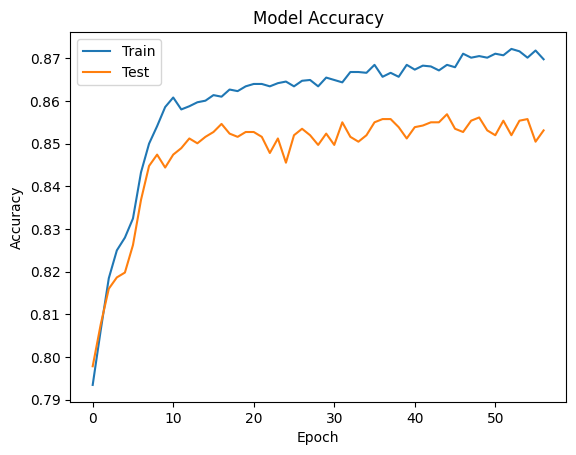

In [32]:
# Plottig for the accuracy(Train and Test)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

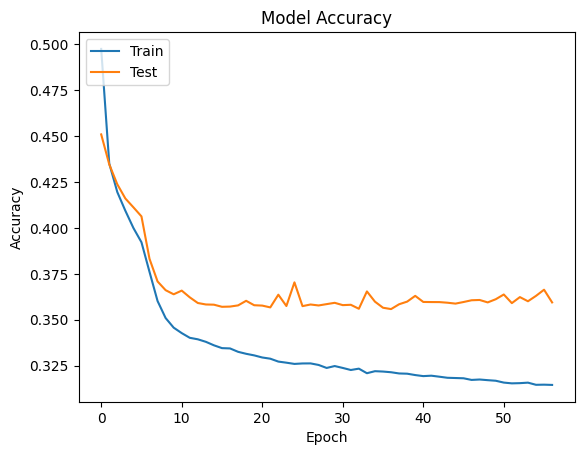

In [33]:
# Plotting for the Loss(Train and Test)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
# Part 3: Make the predictions and evaluating the model
y_predict = classifier.predict(X_test)
y_predict = (y_predict >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[1525,   70],
       [ 212,  193]])

In [36]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.859

In [37]:
# get the weights:
classifier.get_weights()

[array([[-5.16695194e-02, -3.16401631e-01,  1.84031934e-01,
         -1.97537318e-01, -6.69041499e-02, -7.85320401e-02,
         -8.42610449e-02, -2.85902470e-01, -3.48663442e-02,
         -3.87347899e-02,  1.91589162e-01],
        [ 5.38197994e-01, -1.30500123e-01, -3.99672210e-01,
          1.00677192e+00, -8.05604398e-01, -8.00728261e-01,
         -1.91004470e-01,  4.70916033e-01, -8.27414542e-02,
         -6.22300684e-01, -3.86160314e-01],
        [ 7.98464715e-02,  2.34161511e-01,  1.86712906e-01,
         -1.14771007e-02,  7.13101849e-02,  1.29271656e-01,
          2.76693732e-01,  3.80834520e-01, -2.03593206e-02,
         -2.04036698e-01, -1.73512492e-02],
        [-2.75550932e-01,  5.35895005e-02, -1.17449558e+00,
          1.00198306e-01,  1.47978514e-01,  1.16476946e-01,
         -3.22042346e-01, -1.67505860e-01, -7.06434131e-01,
         -2.03359872e-01,  2.51838624e-01],
        [-3.53670627e-01, -5.80038309e-01, -2.06556559e-01,
         -4.99418169e-01,  6.67304220e-03, -

In [39]:
new_customers = np.array([
    [600, 40, 3, 60000.0, 2, 1, 1, 50000.0, 1, 0, 1],  # Customer A
    [750, 30, 5, 120000.0, 1, 0, 0, 70000.0, 0, 1, 0], # Customer B
    [500, 50, 8, 0.0, 2, 1, 0, 30000.0, 0, 0, 1]       # Customer C
])

In [41]:
scaled_customers = sc.transform(new_customers)
predictions = classifier.predict(scaled_customers)
predicted_classes = (predictions > 0.5).astype(int)
for i, pred in enumerate(predicted_classes):
    print(f"Customer {chr(65+i)}: {'Churn' if pred[0] == 1 else 'No Churn'} (Probability: {predictions[i][0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Customer A: No Churn (Probability: 0.06)
Customer B: No Churn (Probability: 0.14)
Customer C: No Churn (Probability: 0.08)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
classifier.save('churn_predictions.keras')